<a href="https://colab.research.google.com/github/nikhil-xyz/MNIST_Dataset/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


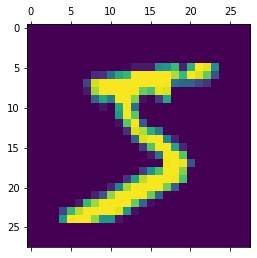

In [ ]:
plt.matshow(x_train[0])

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
len(x_train)

60000

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

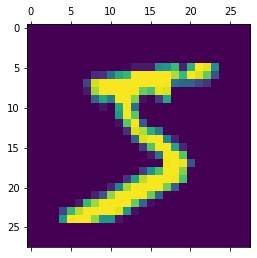

In [ ]:
plt.matshow(x_train[0])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), 
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2628 - accuracy: 0.9244
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1117 - accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0777 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0453 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0368 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0294 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0197 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.016

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9760


[0.09064587950706482, 0.9760000109672546]

In [ ]:
y_predicted = model.predict(x_test)
y_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_labels)

313/313 [==============================] - 1s 3ms/step


Text(87.0, 0.5, 'True')

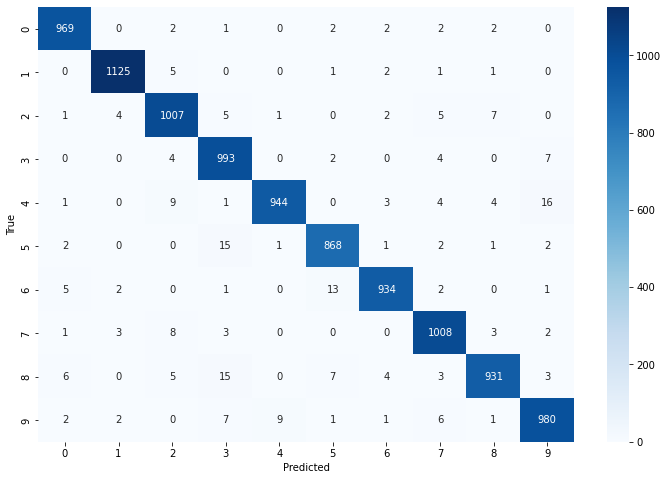

In [ ]:
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')